In [36]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split

sentences_training = []
classification_training = []

path='3000tweet/raw_texts/**/*.txt'

for sayi, tweetdosyasi in enumerate(glob(path, recursive=True)): 
    classification_training.append(tweetdosyasi.split("\\")[1]),
    sentences_training.append((open(tweetdosyasi, encoding="windows-1254").read().replace('\n', ' '))) 

print(sentences_training[0])


dun Turkcelle tepkilerimizden sonra bugün Turkcell twittera sponsor olmuş. Ne tesadüf değil mi ? :)


In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
token = Tokenizer()
token.fit_on_texts(sentences_training)
x = token.texts_to_sequences(sentences_training)
x = pad_sequences(x)
print(x)

[[    0     0     0 ...  1877    59    22]
 [    0     0     0 ...    57   216  3320]
 [    0     0     0 ...  3326  3327  1880]
 ...
 [    0     0     0 ... 12405 12406   251]
 [    0     0     0 ...  1043    20 12412]
 [    0     0     0 ...  2150     1 12413]]


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[-0.01826046 -0.01826046 -0.02540126 ... -0.17926134 -0.74395378
  -0.76039283]
 [-0.01826046 -0.01826046 -0.02540126 ... -0.68459569 -0.70127909
   0.1311133 ]
 [-0.01826046 -0.01826046 -0.02540126 ...  0.22306254  0.14433215
  -0.25814347]
 ...
 [-0.01826046 -0.01826046 -0.02540126 ...  2.7439035   2.61212529
  -0.69849019]
 [-0.01826046 -0.01826046 -0.02540126 ... -0.41082664 -0.7545545
   2.5888373 ]
 [-0.01826046 -0.01826046 -0.02540126 ... -0.10346119 -0.75971896
   2.58910761]]


In [21]:
from keras.utils import to_categorical
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
y = encode.fit_transform(classification_training)
y = to_categorical(y)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)  

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model=Sequential()
model.add(Embedding(10000, 64, input_length=x.shape[1]))
model.add (LSTM(8, return_sequences=True))
model.add (LSTM(4,return_sequences=False))
model.add(Dense(3))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1, validation_data=(x_test, y_test))
predictions=model.predict(x_test)
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 2400 samples, validate on 600 samples
Epoch 1/25
2400/2400 [==============================] - 5s 2ms/step - loss: 3.9447 - accuracy: 0.6667 - val_loss: 3.8482 - val_accuracy: 0.6667
Epoch 2/25
2400/2400 [==============================] - 4s 1ms/step - loss: 3.8685 - accuracy: 0.6667 - val_loss: 3.8340 - val_accuracy: 0.6667
Epoch 3/25
2400/2400 [==============================] - 4s 2ms/step - loss: 3.6456 - accuracy: 0.6688 - val_loss: 0.9401 - val_accuracy: 0.6672
Epoch 4/25
2400/2400 [==============================] - 4s 2ms/step - loss: 0.6835 - accuracy: 0.6736 - val_loss: 0.5515 - val_accuracy: 0.6828
Epoch 5/25
2400/2400 [==============================] - 4s 2ms/step - loss: 0.5813 - accuracy: 0.6864 - val_loss: 0.5715 - val_accuracy: 0.7417
Epoch 6/25
2400/2400 [==============================] - 4s 2ms/step - loss: 0.5426 - accuracy: 0.7011 - val_loss: 0.5050 - val_accuracy: 0.7222
Epoch 7/25
2400/2400 [==============================] - 4s 2ms/step - loss: 0.5071 - accu

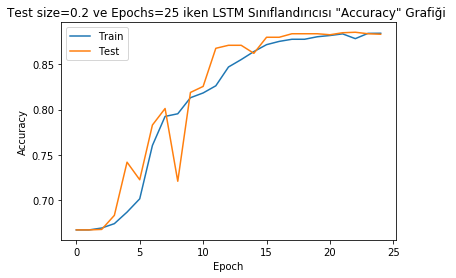

In [26]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test size=0.2 ve Epochs=25 iken LSTM Sınıflandırıcısı "Accuracy" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

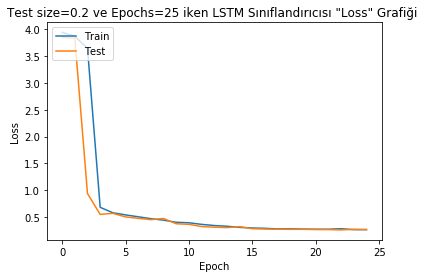

In [27]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test size=0.2 ve Epochs=25 iken LSTM Sınıflandırıcısı "Loss" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.50) 

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model=Sequential()
model.add(Embedding(10000, 64, input_length=x.shape[1]))
model.add (LSTM(8, return_sequences=True))
model.add (LSTM(4,return_sequences=False))
model.add(Dense(3))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1, validation_data=(x_test, y_test))
predictions=model.predict(x_test)
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 1500 samples, validate on 1500 samples
Epoch 1/25
1500/1500 [==============================] - 4s 3ms/step - loss: 2.7123 - accuracy: 0.6667 - val_loss: 2.6842 - val_accuracy: 0.6667
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2991 - accuracy: 0.6667 - val_loss: 0.5829 - val_accuracy: 0.6680
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5568 - accuracy: 0.6802 - val_loss: 0.5317 - val_accuracy: 0.6984
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5081 - accuracy: 0.7242 - val_loss: 0.4954 - val_accuracy: 0.7651
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4863 - accuracy: 0.7969 - val_loss: 0.4663 - val_accuracy: 0.7980
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4535 - accuracy: 0.8158 - val_loss: 0.4540 - val_accuracy: 0.7989
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4439 - acc

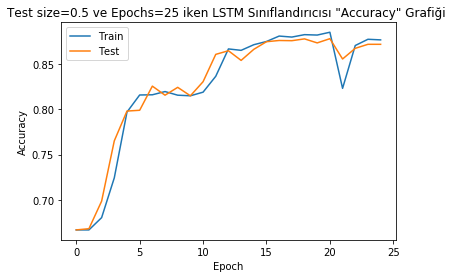

In [29]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test size=0.5 ve Epochs=25 iken LSTM Sınıflandırıcısı "Accuracy" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

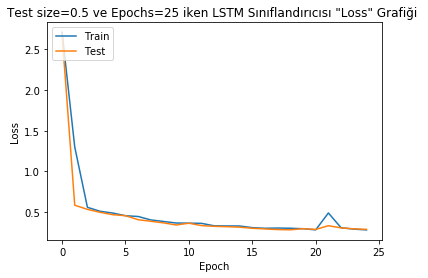

In [30]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test size=0.5 ve Epochs=25 iken LSTM Sınıflandırıcısı "Loss" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.70) 

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model=Sequential()
model.add(Embedding(10000, 64, input_length=x.shape[1]))
model.add (LSTM(8, return_sequences=True))
model.add (LSTM(4,return_sequences=False))
model.add(Dense(3))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1, validation_data=(x_test, y_test))
predictions=model.predict(x_test)
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 900 samples, validate on 2100 samples
Epoch 1/25
900/900 [==============================] - 4s 4ms/step - loss: 3.3254 - accuracy: 0.6504 - val_loss: 3.2876 - val_accuracy: 0.6667
Epoch 2/25
900/900 [==============================] - 2s 2ms/step - loss: 3.2990 - accuracy: 0.6685 - val_loss: 3.2701 - val_accuracy: 0.6784
Epoch 3/25
900/900 [==============================] - 2s 2ms/step - loss: 3.2120 - accuracy: 0.6993 - val_loss: 2.6643 - val_accuracy: 0.7006
Epoch 4/25
900/900 [==============================] - 2s 2ms/step - loss: 1.0508 - accuracy: 0.7033 - val_loss: 0.5743 - val_accuracy: 0.7454
Epoch 5/25
900/900 [==============================] - 2s 2ms/step - loss: 0.5505 - accuracy: 0.7452 - val_loss: 0.5312 - val_accuracy: 0.7362
Epoch 6/25
900/900 [==============================] - 2s 2ms/step - loss: 0.5178 - accuracy: 0.7467 - val_loss: 0.5112 - val_accuracy: 0.7443
Epoch 7/25
900/900 [==============================] - 2s 2ms/step - loss: 0.5007 - accuracy: 0.7489 -

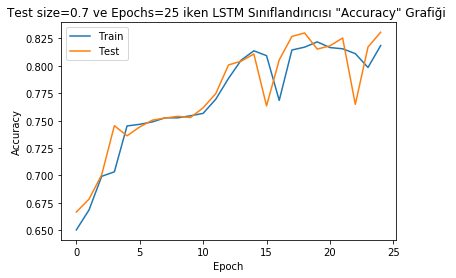

In [33]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test size=0.7 ve Epochs=25 iken LSTM Sınıflandırıcısı "Accuracy" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

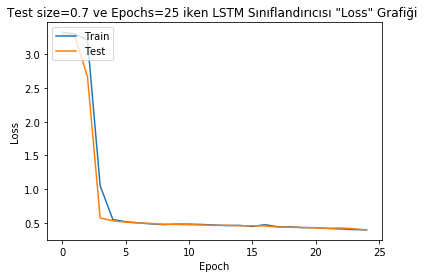

In [34]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test size=0.7 ve Epochs=25 iken LSTM Sınıflandırıcısı "Loss" Grafiği ')
plt.legend(['Train','Test'], loc='upper left')
plt.show()